In [1]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
# 取前k倍奇异值数量的特征，对图像进行还原
def get_image_feature(s, k):
    # 对于S，只保留前K个特征值
    s_temp = np.zeros(s.shape[0])
    n = int(s.shape[0]*k)
    s_temp[0:n] = s[0:n]
    s = s_temp * np.identity(s.shape[0])
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p, s)
    temp = np.dot(temp, q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    print(A-temp)

In [3]:
# 将 RGB 转为灰度图
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

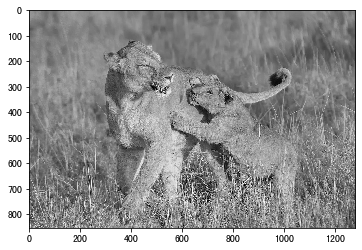

In [4]:
# 加载图片
image = img.imread('./image.png', 0)
A = rgb2gray(image)  
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [5]:
A

array([[150.998, 142.998, 134.998, ..., 120.696, 119.696, 118.696],
       [144.998, 139.998, 135.998, ..., 120.696, 119.696, 119.696],
       [140.998, 139.998, 139.998, ..., 119.696, 120.696, 120.696],
       ...,
       [139.946, 112.718, 116.735, ..., 141.786, 114.259,  89.259],
       [138.946, 149.718, 127.735, ..., 134.786, 104.259,  85.259],
       [170.946, 157.718, 114.735, ..., 125.786,  98.259,  89.259]])

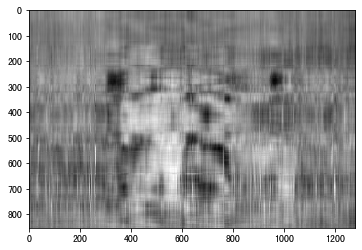

[[ 19.87864673  12.81749541   5.22131637 ...   8.39130678   8.67223851
    8.56241244]
 [ 13.91880282   9.85928753   6.30110633 ...   8.43039915   8.72354101
    9.60342397]
 [  9.83799987   9.82783618  10.34541873 ...   7.51178805   9.82432725
   10.68272153]
 ...
 [  1.94891749 -21.7111696  -11.44754783 ...  36.02942968  10.00557921
  -17.5696223 ]
 [  1.8967721   15.66752359  -0.45637706 ...  30.75613679   1.25262269
  -20.8603684 ]
 [ 34.70962966  23.95128625 -14.00676584 ...  20.26199998  -6.5103246
  -18.2116226 ]]


In [6]:
# 对图像矩阵A进行奇异值分解，得到p,s,q
p, s, q = svd(A, full_matrices=False)
# 取前1%特征，对图像进行还原
get_image_feature(s, 0.01)

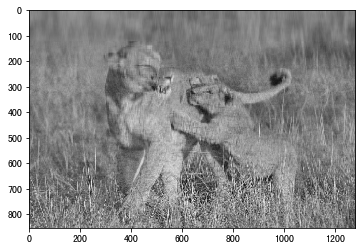

[[  9.75359058   2.79412706  -4.51640907 ...  -1.41932567  -2.59237769
   -3.51494173]
 [  4.0173547   -0.09194461  -3.42033093 ...  -1.87195572  -3.08620039
   -2.73178704]
 [  0.27514652   0.2552632    1.03822928 ...  -2.98444743  -2.31976796
   -1.82642934]
 ...
 [-23.94731178 -15.01644161  -4.12640174 ...  18.94205113  10.37208324
    0.39109241]
 [-21.17845723   9.80405538   3.75110265 ...   5.95392759  -6.6228209
   -7.25878476]
 [ 11.41085466  19.70180827  -2.25799446 ...  -2.1020735   -5.16512895
   -5.79128389]]


In [7]:
# 取前10%特征，对图像进行还原
get_image_feature(s, 0.1)

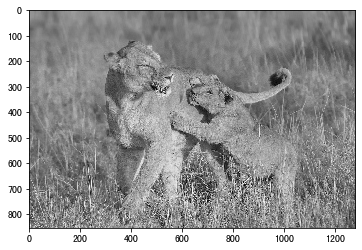

[[ 7.98328178  0.86302762 -5.63737431 ... -1.34963708 -3.19017581
  -1.53398323]
 [ 2.87703301 -1.93445158 -5.57239438 ... -1.07898649 -3.35065524
  -0.68704131]
 [-1.42635093 -2.34479677 -2.1433974  ... -1.29102407 -1.67257218
  -0.01222825]
 ...
 [ 0.68069779 -0.46807708 -1.45192677 ...  5.02143348 -1.63709733
  -0.34574338]
 [-1.39575444  0.48079833  1.09484816 ... -6.07310401  0.04176136
  -0.6122583 ]
 [ 0.83103802  0.40179761 -1.42670813 ...  3.61347546 -0.64725861
   2.1603507 ]]


In [8]:
# 取前50%特征，对图像进行还原
get_image_feature(s, 0.5)